In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
c = pd.read_csv('processed.cleveland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})
h = pd.read_csv('processed.hungarian.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

s = pd.read_csv('processed.switzerland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

v = pd.read_csv('processed.va.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

In [3]:
#Concatenate all datafeames
frames = [c, h, s, v]
heart_disease = pd.concat(frames)

In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [5]:
heart_disease.describe()

,age,sex,cp,num
count,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,0.995652
std,9.424685,0.408148,0.930969,1.142693
min,28.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000
max,77.000000,1.000000,4.000000,4.000000


In [6]:
#change type of columns to float
heart_disease = heart_disease.apply(pd.to_numeric, errors='coerce')

In [7]:
# fill NA with mean of each columns
heart_disease = heart_disease.fillna(heart_disease.mean())

In [8]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<AxesSubplot:>

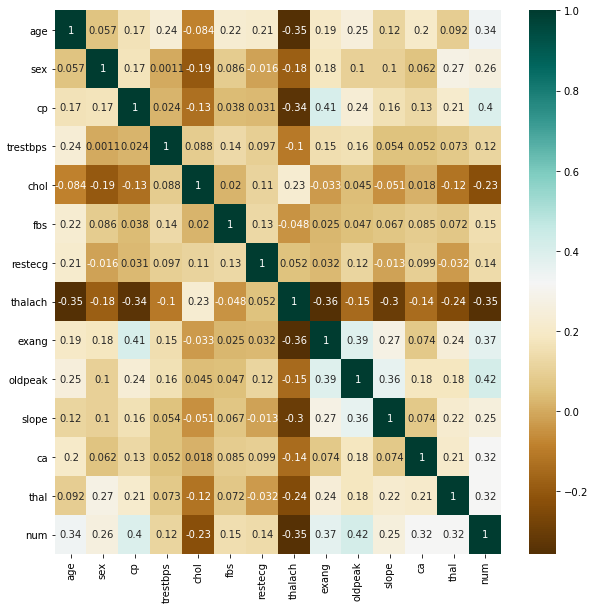

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heart_disease.corr(),cmap="BrBG",annot=True)

In [13]:
from sklearn.model_selection import train_test_split
X = heart_disease.iloc[0:, 1:]
y = heart_disease['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=90)

# cross-validation

In [14]:
# step-1: create a cross-validation scheme
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 50)

In [15]:
# step-2: specify range of hyperparameters to tune, consider all available features
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns)+1))}]

In [16]:
# step-3: perform grid search
# specify model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

In [17]:
# 3.2 call GridSearchCV(), return_train_score=True ensure that train score
#along with test score will be returned
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, 
                        scoring= 'r2', cv = folds, verbose = 1, 
                        return_train_score=True)

In [18]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [19]:
prediction = model_cv.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_test, prediction))

1.0


In [21]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017690,0.003688,0.002873,0.000144,1,{'n_features_to_select': 1},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.014763,0.000959,0.002881,0.000316,2,{'n_features_to_select': 2},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.013594,0.000659,0.002788,0.000096,3,{'n_features_to_select': 3},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.012395,0.000035,0.002720,0.000026,4,{'n_features_to_select': 4},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.011897,0.000406,0.002969,0.000196,5,{'n_features_to_select': 5},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.008406,0.000604,0.002085,0.000087,6,{'n_features_to_select': 6},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.010077,0.002564,0.002835,0.000773,7,{'n_features_to_select': 7},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.010250,0.004522,0.003604,0.001146,8,{'n_features_to_select': 8},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.006455,0.000532,0.002198,0.000245,9,{'n_features_to_select': 9},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.005140,0.000010,0.001923,0.000024,10,{'n_features_to_select': 10},1.0,1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


# Mutual information

In [22]:
from sklearn.model_selection import train_test_split
X = heart_disease.iloc[0:, 1:]
y = heart_disease['num']

In [23]:
from sklearn.model_selection import train_test_split as tts
X_train_1,X_test_1,y_train,y_test = tts(
    X,y
    ,random_state=0
    ,stratify=y
)

In [24]:
#compute MI score
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(X,y)
print(mi_scores)

[0.05121345 0.16124474 0.01386958 0.0833772  0.06274536 0.00340964
 0.07686864 0.07255377 0.1352581  0.08375412 0.02943702 0.06119274
 1.3298991 ]


In [31]:
mi_score_selected_index = np.where(mi_scores >0.08)[0]
X_2 = X.iloc[:,mi_score_selected_index]
X_train_2,X_test_2,y_train,y_test = tts(
    X_2,y
    ,random_state=0
    ,stratify=y
)

In [32]:
mi_score_selected_index = np.where(mi_scores < 0.8)[0]
X_3 = X.iloc[:,mi_score_selected_index]
X_train_3,X_test_3,y_train,y_test = tts(
    X_3,y
    ,random_state=0
    ,stratify=y
)

In [33]:
from sklearn.tree import DecisionTreeClassifier as DTC
model_1 = DTC().fit(X_train_1,y_train)
model_2 = DTC().fit(X_train_2,y_train)
model_3 = DTC().fit(X_train_3,y_train)
score_1 = model_1.score(X_test_1,y_test)
score_2 = model_2.score(X_test_2,y_test)
score_3 = model_3.score(X_test_3,y_test)
print(f"score_1:{score_1}\n score_2:{score_2}\n score_3:{score_3}")

score_1:1.0
 score_2:1.0
 score_3:0.48695652173913045
